## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import shap
import joblib

# load JS visualization code to notebook. Without this, the SHAP plots won't be displayed
shap.initjs()

#removing the warnings display
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


## Exploratory Data Analysis

In [3]:
heart_data.shape

(212, 14)

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [5]:
#target variable balance
heart_data.target.value_counts()

1    115
0     97
Name: target, dtype: int64

In [6]:
#checking for null values
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Now we will explore each variable

### Age

In [7]:
#frequency
heart_data.age.value_counts()

57    15
58    13
54    10
60    10
41     9
59     9
52     9
62     8
67     8
53     7
61     7
63     7
64     6
65     6
45     6
44     6
43     6
42     6
51     6
48     4
50     4
55     4
56     4
66     4
68     4
35     3
47     3
46     3
69     3
71     3
40     3
39     3
38     3
49     2
70     2
37     2
34     1
77     1
76     1
29     1
Name: age, dtype: int64

In [8]:
heart_data['age'].max(), heart_data['age'].min()

(77, 29)

<AxesSubplot:ylabel='Frequency'>

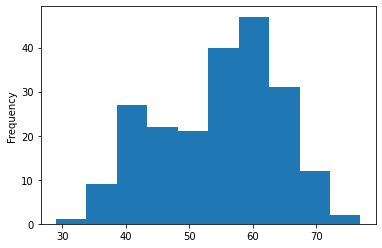

In [9]:
#distribution
#With the above information and this plot we will try to identify extreme values
heart_data['age'].plot.hist(bins=10)

### Sex

In [10]:
#frequency
#according to the dictionary: sex: 1 = male, 0 = female
heart_data.sex.value_counts()

1    146
0     66
Name: sex, dtype: int64

In [11]:
#percentage of both sexes
sum(heart_data.sex==0)/heart_data.shape[0], sum(heart_data.sex==1)/heart_data.shape[0]

(0.3113207547169811, 0.6886792452830188)

### Chest Pain

In [12]:
#frequency
# the dictionary doesn't describe what each number means, 
# we'll assume its an incremental scale, where 0 is the no pain, and 3 is very painful
heart_data.cp.value_counts()

0    104
2     60
1     35
3     13
Name: cp, dtype: int64

In [13]:
#percentage of each pain type
sum(heart_data.cp==0)/heart_data.shape[0], sum(heart_data.cp==1)/heart_data.shape[0], sum(heart_data.cp==2)/heart_data.shape[0], sum(heart_data.cp==3)/heart_data.shape[0]

(0.49056603773584906,
 0.1650943396226415,
 0.2830188679245283,
 0.06132075471698113)

### Resting blood pressure

In [14]:
#trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
heart_data.trestbps.value_counts()

130    29
140    21
120    19
110    15
150    14
128     9
160     8
112     8
138     7
125     6
132     6
124     5
118     5
135     4
145     4
152     4
100     3
126     3
115     3
136     3
170     3
180     2
105     2
102     2
134     2
108     2
122     2
142     2
144     2
114     1
101     1
117     1
192     1
123     1
129     1
146     1
148     1
154     1
155     1
156     1
164     1
165     1
172     1
174     1
178     1
94      1
Name: trestbps, dtype: int64

In [15]:
heart_data['trestbps'].max(), heart_data['trestbps'].min()

(192, 94)

<AxesSubplot:ylabel='Frequency'>

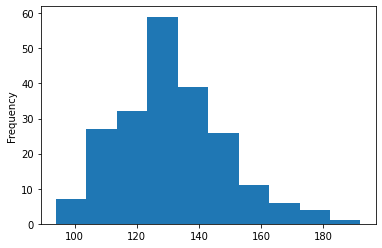

In [16]:
#distribution
#With the above information and this plot we will try to identify extreme values
heart_data['trestbps'].plot.hist(bins=10)

### Serum Cholesterol

In [17]:
# chol: serum cholesterol in mg/dl
heart_data.chol.value_counts()

234    5
204    4
197    4
254    4
239    4
      ..
160    1
166    1
167    1
168    1
172    1
Name: chol, Length: 134, dtype: int64

In [18]:
heart_data.chol.max(), heart_data.chol.min()

(564, 126)

<AxesSubplot:ylabel='Frequency'>

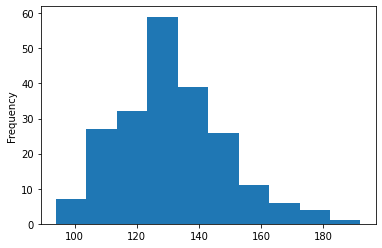

In [19]:
#distribution
#With the above information and this plot we will try to identify extreme values
heart_data['trestbps'].plot.hist(bins=10)

Note: The 564 maximum seems like a very odd value, literature states that anything above 240 is considered very high. However a quick research didn't show if such an high value is actually possible or if this is an error in the data.

### Fasting blood sugar

In [20]:
# fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
heart_data.fbs.value_counts()

0    177
1     35
Name: fbs, dtype: int64

In [21]:
#percentage
sum(heart_data.fbs==0)/heart_data.shape[0], sum(heart_data.fbs==1)/heart_data.shape[0]

(0.8349056603773585, 0.1650943396226415)

### Resting electrocardiographic results

In [22]:
#restecg: Resting electrocardiographic results
#nothing further is said about this feature, we have no clue what the 0, 1 and the low fequency 2 mean
heart_data.restecg.value_counts()

1    108
0    101
2      3
Name: restecg, dtype: int64

In [23]:
#percentage
sum(heart_data.restecg==0)/heart_data.shape[0], sum(heart_data.restecg==1)/heart_data.shape[0], sum(heart_data.restecg==2)/heart_data.shape[0]

(0.47641509433962265, 0.5094339622641509, 0.014150943396226415)

### Maximum heart rate achieved

In [24]:
#thalach: Maximum heart rate achieved
heart_data.thalach.value_counts()

143    7
150    7
163    6
173    6
132    6
      ..
130    1
129    1
128    1
127    1
71     1
Name: thalach, Length: 82, dtype: int64

In [25]:
heart_data.thalach.max(), heart_data.thalach.min()

(202, 71)

<AxesSubplot:ylabel='Frequency'>

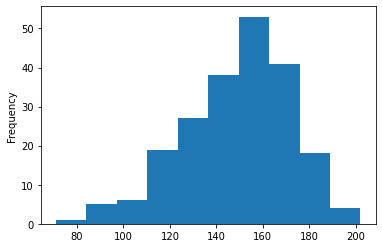

In [26]:
#distribution
#With the above information and this plot we will try to identify extreme values
heart_data['thalach'].plot.hist(bins=10)

### Exercise induced angina

In [27]:
#exang: Exercise induced angina (1 = yes; 0 = no)
heart_data.exang.value_counts()

0    142
1     70
Name: exang, dtype: int64

In [28]:
#percentage
sum(heart_data.exang==0)/heart_data.shape[0], sum(heart_data.exang==1)/heart_data.shape[0]

(0.6698113207547169, 0.330188679245283)

### ST depression induced by exercise relative to rest

In [29]:
#oldpeak: ST depression induced by exercise relative to rest
heart_data.oldpeak.value_counts()

0.0    70
1.2    13
1.0    11
0.6    10
0.8     9
1.4     7
0.2     7
1.6     7
0.1     7
0.4     6
1.8     6
2.0     6
1.5     5
2.8     5
1.9     4
0.5     4
2.2     4
2.6     3
3.0     3
0.9     3
4.0     2
2.3     2
0.3     2
3.4     2
4.2     2
3.6     2
3.5     1
4.4     1
3.2     1
0.7     1
3.8     1
3.1     1
2.9     1
2.4     1
1.1     1
5.6     1
Name: oldpeak, dtype: int64

In [30]:
heart_data.oldpeak.max(), heart_data.oldpeak.min()

(5.6, 0.0)

<AxesSubplot:ylabel='Frequency'>

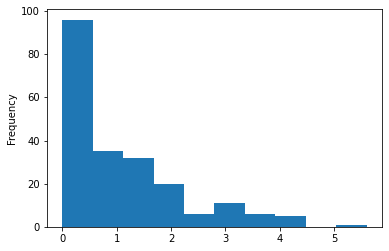

In [31]:
#distribution
#With the above information and this plot we will try to identify extreme values
heart_data['oldpeak'].plot.hist(bins=10)

Note: Again we can't confirm if the 5.6 maximum value makes sense or not.

### The slope of the peak exercise ST segment

In [32]:
#slope: The slope of the peak exercise ST segment
#nothing further is said about this feature, we have no clue what the 0, 1 and 2 means
heart_data.slope.value_counts()

2    107
1     93
0     12
Name: slope, dtype: int64

In [33]:
#percentage
sum(heart_data.slope==0)/heart_data.shape[0], sum(heart_data.slope==1)/heart_data.shape[0], sum(heart_data.slope==2)/heart_data.shape[0]

(0.05660377358490566, 0.4386792452830189, 0.5047169811320755)

### Number of major vessels (0-3) colored by fluoroscopy

In [34]:
#ca: Number of major vessels (0-3) colored by fluoroscopy
heart_data.ca.value_counts()

0    119
1     45
2     27
3     17
4      4
Name: ca, dtype: int64

In [35]:
#percentage
sum(heart_data.ca==0)/heart_data.shape[0], sum(heart_data.ca==1)/heart_data.shape[0], sum(heart_data.ca==2)/heart_data.shape[0], sum(heart_data.ca==3)/heart_data.shape[0], sum(heart_data.ca==4)/heart_data.shape[0]

(0.5613207547169812,
 0.21226415094339623,
 0.12735849056603774,
 0.08018867924528301,
 0.018867924528301886)

### thal: 3 = normal; 6 = fixed defect; 7 = reversible defect

In [36]:
heart_data.thal.value_counts()

2    108
3     87
1     15
0      2
Name: thal, dtype: int64

In [37]:
#percentage
sum(heart_data.thal==0)/heart_data.shape[0], sum(heart_data.thal==1)/heart_data.shape[0], sum(heart_data.thal==2)/heart_data.shape[0], sum(heart_data.thal==3)/heart_data.shape[0]

(0.009433962264150943,
 0.07075471698113207,
 0.5094339622641509,
 0.41037735849056606)

Note: the dictionary speaks of a range of values 3, 6 and 7, however what we see is 0 to 3. even if 0 corresponded to 3 and so on, one value correspondency would be missing. Further information would be needed to validate this feature.

## Visualizations 

In [38]:
#let's create a list with all the numerical and categorical features respectively to get a global view
numerical = ['age','trestbps','chol','thalach','oldpeak']
categorical =['sex','cp','fbs','restecg','exang','slope','ca','thal']

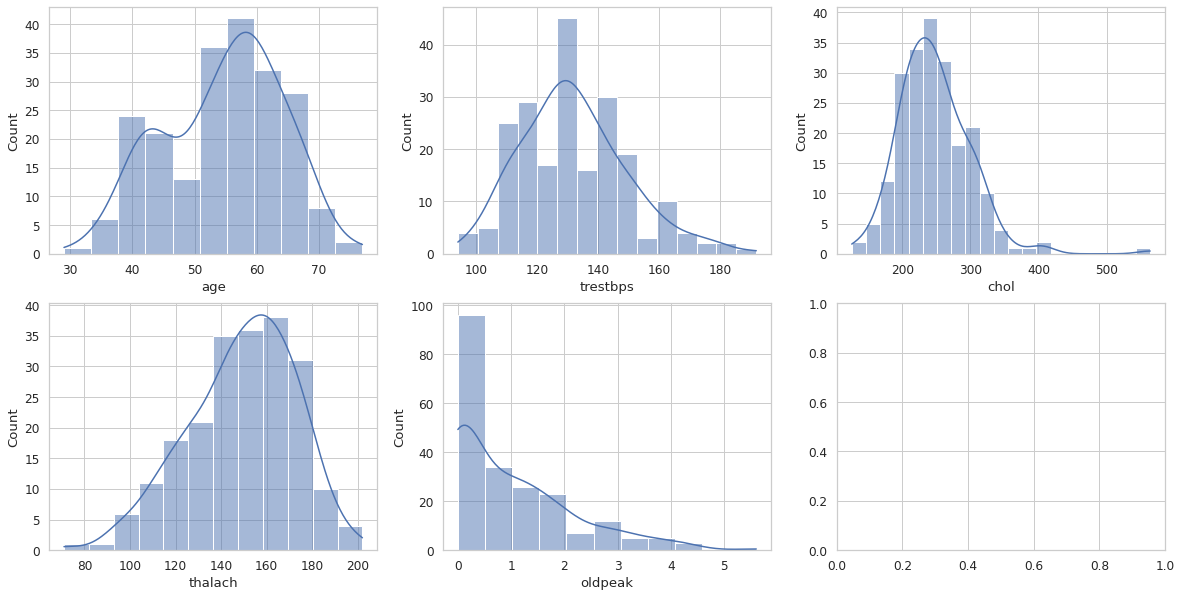

In [39]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.histplot(heart_data[variable], ax=subplot,kde=True)

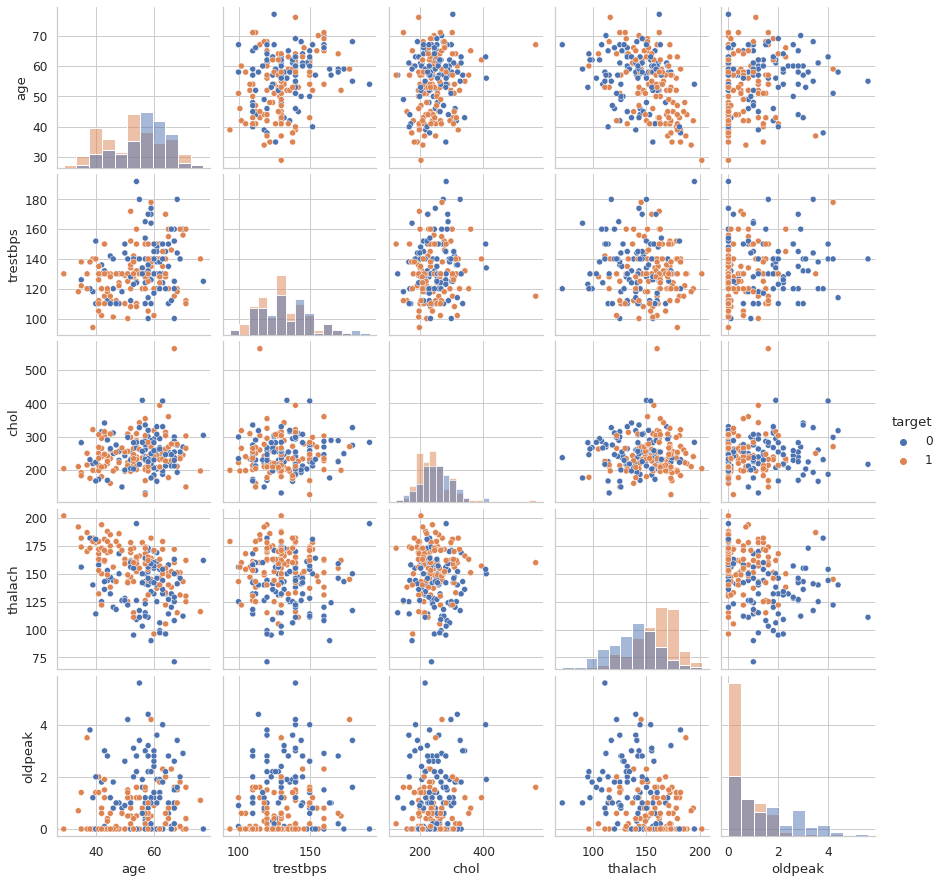

In [40]:
num_data = heart_data.loc[:,['age', 'trestbps', 'chol', 'thalach', 'oldpeak','target']]

sns.pairplot(num_data, kind="scatter", hue='target', diag_kind="hist")
plt.show()

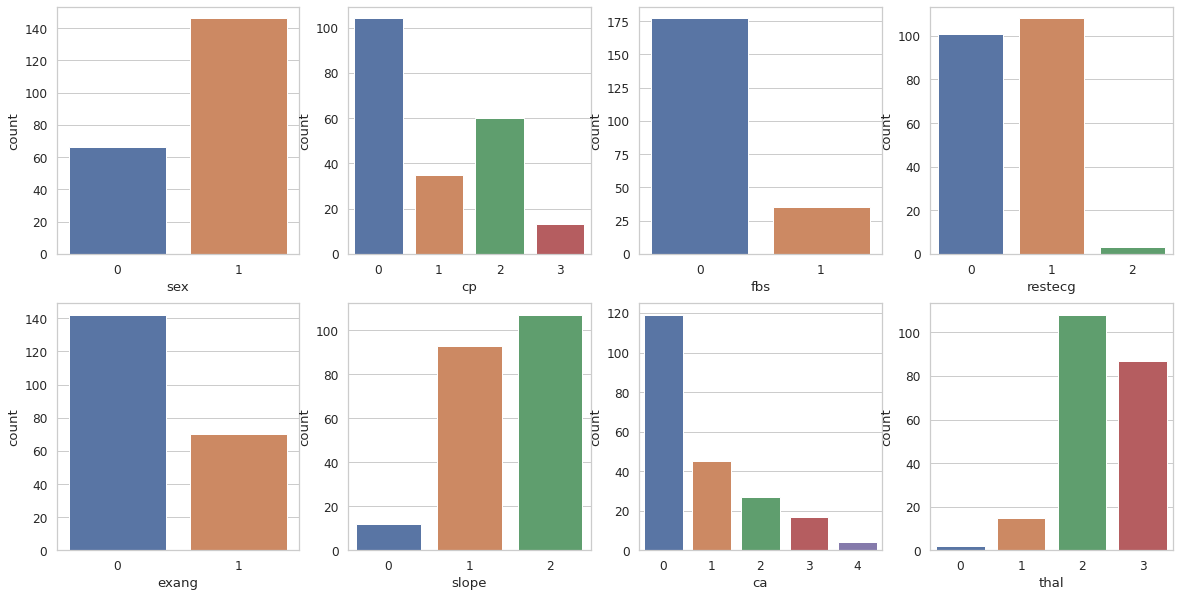

In [41]:
#bar plot of each categorical variable
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(heart_data[variable], ax=subplot)

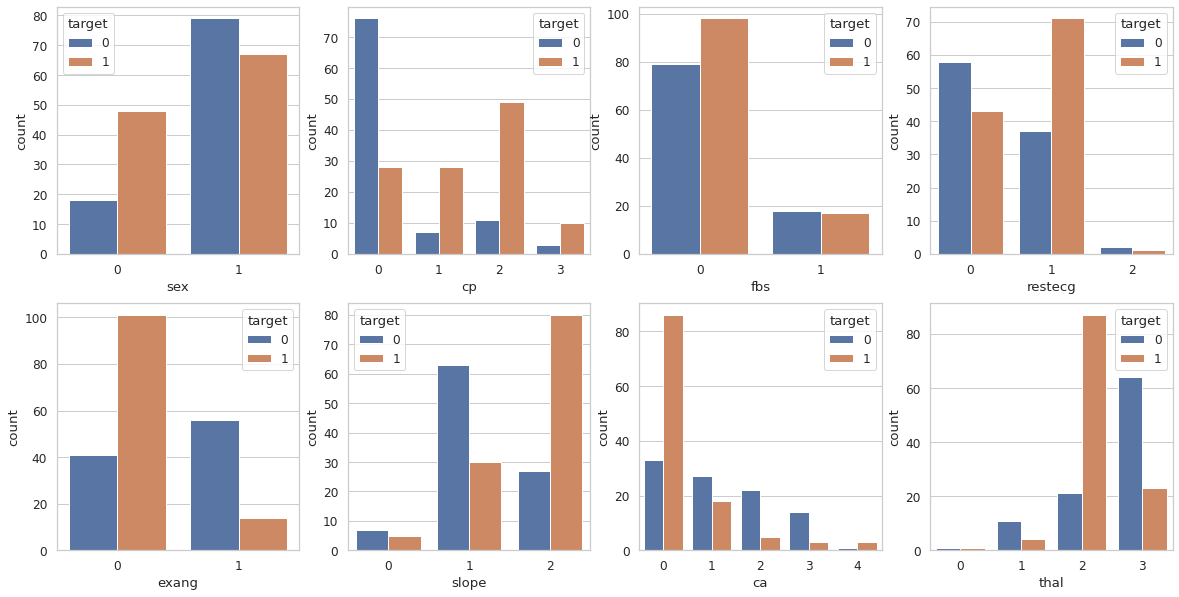

In [42]:
#again but this time with the target variable
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(heart_data[variable], ax=subplot, hue=heart_data['target'])

### Correlation matrix

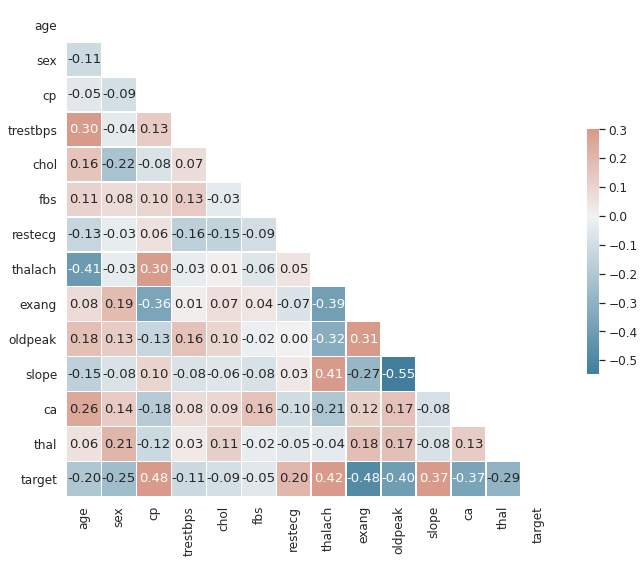

In [43]:
# Compute the correlation matrix
corr = heart_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Exploratory Data Analysis Remarks

So looking at our exploratory analysis a couple of things could be done:


1 - One hot encode all the categorical variables:
    
    Some of the categorical variables have ranges up to 4. So we could one hot encode these, however we will proceed without this. Since our dataset has a small size (212 rows) increasing the number of columns could aproximate our dataset to a square dataset, and this is known to work poorly with machine learning algorithms.
    
2 - Standarize/Normalize all numerical variables:

    The order of magnitude of the numerical variables is very different, so we'll proceed to standarize all numerical features in order to even the ground.
    
3 - Feature validation:
    
    Some values and/or features aren't properly explained, further investigation could help eliminate errors in the dataset. However this is beyond the scope of this exercise and will not proceed with this.

## Separate the Input and Target Features of the data

In [44]:
y = heart_data['target']
X = heart_data.drop(['target'], axis = 1)

## Split the data into Train and Test Sets

In [45]:
# As requested in the assignment the train to test ratio should be 80:20 and the random_state should be 0.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scaling the data

In [46]:
transformed_data = X_train.loc[:,numerical].copy()


ct = ColumnTransformer([
    ('Standarization', StandardScaler(), numerical)
], remainder='passthrough')


transformed_data.loc[:,numerical] = ct.fit_transform(transformed_data)
X_train[numerical] = transformed_data

X_test[numerical] = ct.transform(X_test[numerical])
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
16,0.395363,1,0,1.112438,0.384299,0,0,-1.636932,1,-0.126865,2,0,3
135,-0.421962,0,0,-1.191508,0.086720,0,0,0.377754,0,-0.853650,2,0,2
122,-0.217631,1,0,-1.076311,-0.359648,0,1,0.419726,0,-0.853650,2,1,2
22,1.621350,1,2,1.688424,0.365700,0,1,-1.594960,1,1.780947,1,1,3
80,-0.013300,0,2,-1.191508,-0.657226,0,1,0.335781,0,0.599920,1,0,2


## Logistic Regression Model

In [47]:
#baseline
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

## Baseline Results on the training set

Accuracy: 85.21%
Matthews Correlation Coefficient: 0.70
F1-Score: 86.34%
AUC Score: 0.85
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        79
           1       0.85      0.88      0.86        90

    accuracy                           0.85       169
   macro avg       0.85      0.85      0.85       169
weighted avg       0.85      0.85      0.85       169



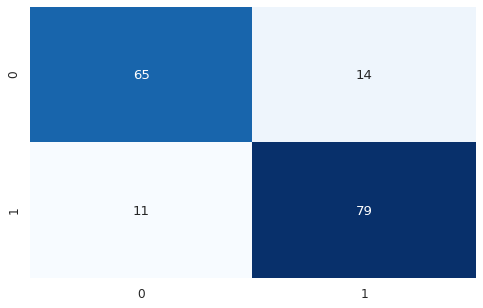

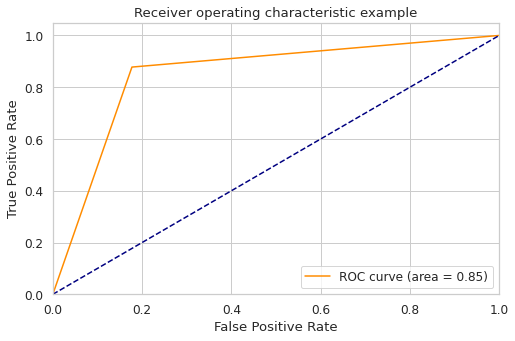

In [48]:
y_pred = lr.predict(X_train)
# evaluate predictions
accuracy_train = accuracy_score(y_train, y_pred)
mcc_train = matthews_corrcoef(y_train, y_pred)
f1_train = f1_score(y_train, y_pred)
auc_train = roc_auc_score(y_train, y_pred)
print("Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("Matthews Correlation Coefficient: %.2f" % (mcc_train))
print("F1-Score: %.2f%%" % (f1_train*100.0))
print("AUC Score: %.2f" % (auc_train))
print('Classification report: \n' + classification_report(y_train, y_pred))

cfm = confusion_matrix(y_train,y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Baseline Results on the test set

Accuracy: 83.72%
Matthews Correlation Coefficient: 0.66
F1-Score: 86.27%
AUC Score: 0.83
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.85      0.88      0.86        25

    accuracy                           0.84        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.84      0.84      0.84        43



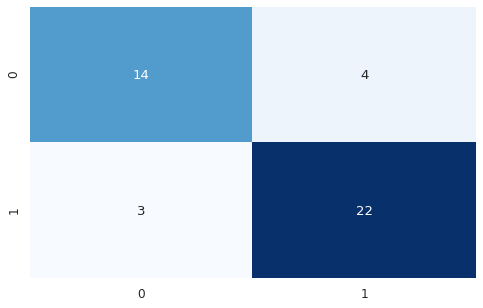

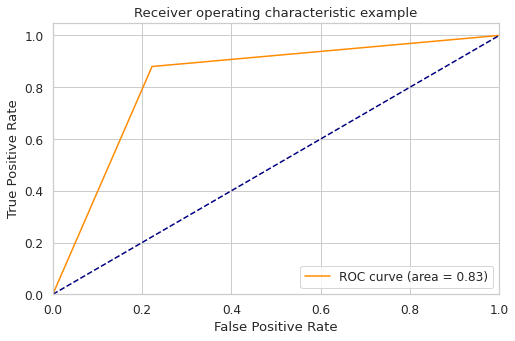

In [49]:
y_pred = lr.predict(X_test)
# evaluate predictions
accuracy_test = accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
auc_test = roc_auc_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy_test * 100.0))
print("Matthews Correlation Coefficient: %.2f" % (mcc_test))
print("F1-Score: %.2f%%" % (f1_test*100.0))
print("AUC Score: %.2f" % (auc_test))
print('Classification report: \n' + classification_report(y_test, y_pred))

cfm = confusion_matrix(y_test,y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter GridSearch

In [50]:
#Since it's a binary classification problem we will use AUC as the parameter for scoring

param_test1 = {
    'penalty':['l1', 'l2', 'elasticnet'],
    'C':[0.001,0.01,0.1,1,10,100],
    'class_weight':['balanced', None],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'l1_ratio':[0,0.1,0.5,1] 

}

gsearch1 = GridSearchCV(estimator = LogisticRegression(random_state=0), 
                        param_grid = param_test1, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=5,
                       verbose=2)

gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:    6.5s finished


({'C': 0.1,
  'class_weight': None,
  'l1_ratio': 0.1,
  'penalty': 'elasticnet',
  'solver': 'saga'},
 0.9287962962962963)

## Fine Tuning: C parameter

In [51]:
param_test2 = {
    'C':[0.05, 0.075, 0.9, 0.1, 0.11, 0.125, 0.15],
}

gsearch2 = GridSearchCV(estimator = LogisticRegression(random_state=0,
                                                       C = 0.1,
                                                      class_weight = None,
                                                       penalty='elasticnet',
                                                      l1_ratio = 0.1,
                                                       solver = 'saga'
                                                      ), 
                        param_grid = param_test2, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=5,
                       verbose=2)

gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits


({'C': 0.1}, 0.9287962962962963)

## Fine Tuning: l1_ratio parameter

In [52]:
param_test3 = {
    'l1_ratio':[0.05, 0.075, 0.9, 0.1, 0.11, 0.125, 0.15],
}

gsearch3 = GridSearchCV(estimator = LogisticRegression(random_state=0,
                                                       C = 0.1,
                                                      class_weight = None,
                                                       penalty='elasticnet',
                                                      l1_ratio = 0.1,
                                                       solver = 'saga'
                                                      ), 
                        param_grid = param_test3, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=5,
                       verbose=2)

gsearch3.fit(X_train, y_train)
gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


({'l1_ratio': 0.1}, 0.9287962962962963)

In [53]:
#instatiating the model with the parameters found
model = LogisticRegression(random_state=0,
                                                       C = 0.1,
                                                      class_weight = None,
                                                       penalty='elasticnet',
                                                      l1_ratio = 0.1,
                                                       solver = 'saga'
                                                      )

model.fit(X_train,y_train)

LogisticRegression(C=0.1, l1_ratio=0.1, penalty='elasticnet', random_state=0,
                   solver='saga')

## Model Evaluation

Accuracy: 82.84%
Matthews Correlation Coefficient: 0.66
F1-Score: 84.49%
AUC Score: 0.82
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        79
           1       0.81      0.88      0.84        90

    accuracy                           0.83       169
   macro avg       0.83      0.82      0.83       169
weighted avg       0.83      0.83      0.83       169



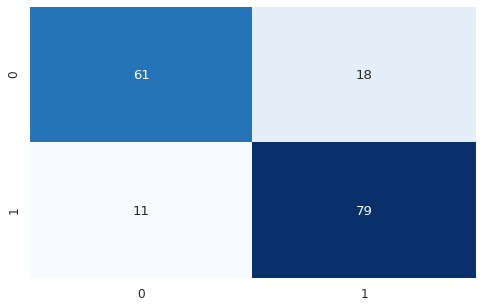

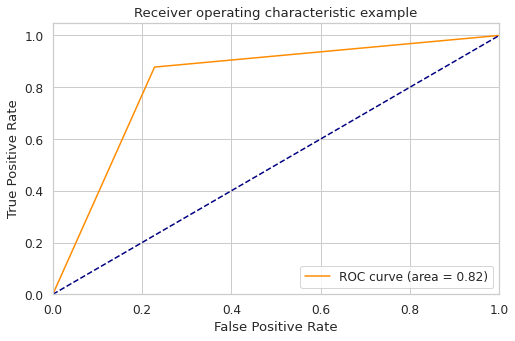

In [54]:
y_pred = model.predict(X_train)
# evaluate predictions
accuracy_train = accuracy_score(y_train, y_pred)
mcc_train = matthews_corrcoef(y_train, y_pred)
f1_train = f1_score(y_train, y_pred)
auc_train = roc_auc_score(y_train, y_pred)
print("Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("Matthews Correlation Coefficient: %.2f" % (mcc_train))
print("F1-Score: %.2f%%" % (f1_train*100.0))
print("AUC Score: %.2f" % (auc_train))
print('Classification report: \n' + classification_report(y_train, y_pred))

cfm = confusion_matrix(y_train,y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Accuracy: 79.07%
Matthews Correlation Coefficient: 0.57
F1-Score: 82.35%
AUC Score: 0.78
Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.81      0.84      0.82        25

    accuracy                           0.79        43
   macro avg       0.79      0.78      0.78        43
weighted avg       0.79      0.79      0.79        43



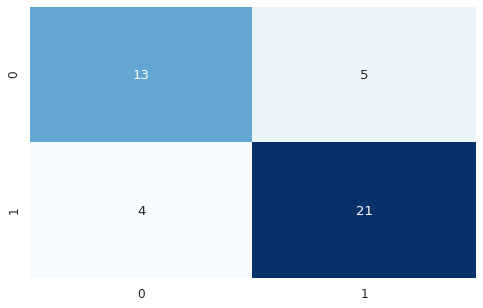

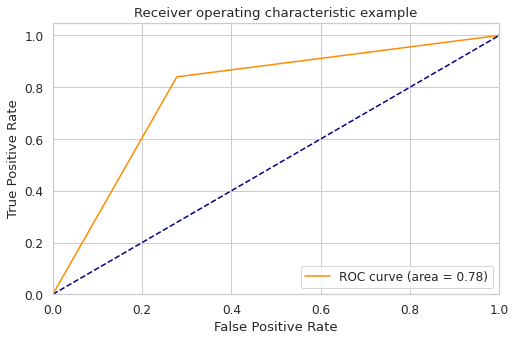

In [55]:
y_pred = model.predict(X_test)
# evaluate predictions
accuracy_test = accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
auc_test = roc_auc_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy_test * 100.0))
print("Matthews Correlation Coefficient: %.2f" % (mcc_test))
print("F1-Score: %.2f%%" % (f1_test*100.0))
print("AUC Score: %.2f" % (auc_test))
print('Classification report: \n' + classification_report(y_test, y_pred))

cfm = confusion_matrix(y_test,y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Explaining the model predictions with SHAP

In [56]:
# creating an explainer for our model
explainer = shap.Explainer(model, X_train, features_names=X_train.columns)

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_test)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

Expected Value: 0.2835503433363479


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,-0.084177,0.770992,-0.107523,-0.0,0.0,-0.156251,0.304503,0.180156,0.284983,0.142601,0.219756,0.145642
1,-0.0,0.187362,0.770992,0.016781,-0.0,-0.0,-0.156251,-0.715266,0.180156,0.284983,0.142601,0.219756,1.224475
2,0.0,0.187362,0.106344,-0.024654,0.0,-0.0,0.095767,0.324898,0.180156,-0.194652,0.142601,0.219756,0.145642
3,-0.0,-0.084177,0.106344,0.203238,-0.0,-0.0,0.095767,0.059758,0.180156,0.284983,0.142601,0.219756,0.145642
4,0.0,-0.084177,1.435640,-0.418284,-0.0,-0.0,-0.156251,0.100549,0.180156,0.045166,-0.160805,0.219756,-0.393774


In [57]:
#predicted vs true
y_pred = model.predict(X_test)
y_pred[0], y_test.loc[y_test.index[0]]

(1, 1)

## SHAP force plot for the first entry

In [58]:
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], X_test.iloc[0,:])

This shows us how the model predicted that there was an heart disease in the first row of data (aka person/patient).

Every value above the baseline value will be predicted as a 1 value, meaning that there is an heart disease and everything below will be a 0 (no heart disease).

Additionaly we can see how much each feature "pushed" the prediction in either direction.
Meaning that values in the features in red summed with the values in blue resulted in a positive prediction (aka heart disease present).

## Waterfall plot for the first entry

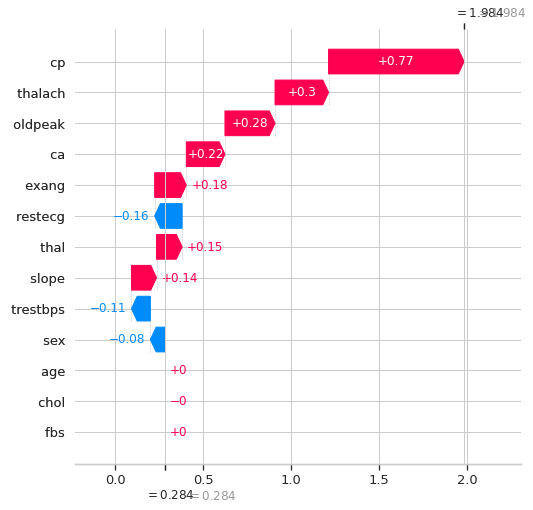

In [59]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value,shap_values[0], X_test.iloc[0],max_display=X_test.shape[1])

## Force plot of the whole set

In [60]:
shap.force_plot(explainer.expected_value, 
                shap_values[:,:], X_test.iloc[:,:])

In this plot we can see the same thing as above in the force plot but for the complete dataset. We can have hints on how each feature is contributing across the dataset.

## Summary

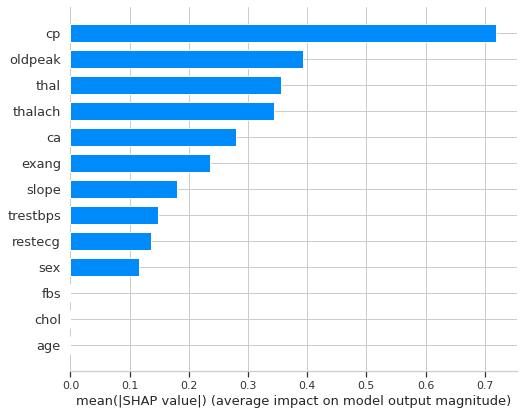

In [61]:
shap.summary_plot(shap_values, 
                  X_test, plot_type="bar")

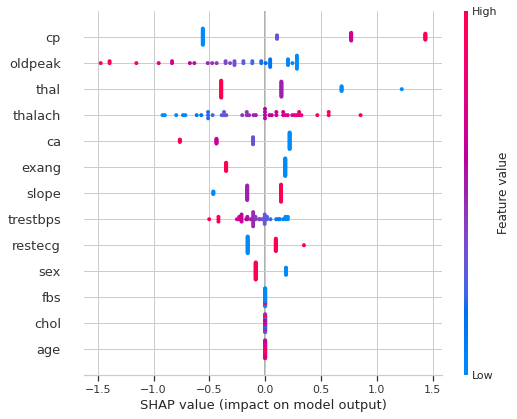

In [62]:
shap.summary_plot(shap_values, X_test)

The SHAP summary is showing us that the chest pain is the feature that contributes the most when the model predicts that there is a heart disease (target = 0). 

While oldpeak (ST depression induced by exercise relative to rest) has a high weight on predictions without heart disease (target = 0). 

Whereas thalach (Maximum heart rate achieved) has a meaningful impact on both scenarios.

Finally it oddly shows that features like age, cholesterol and fasting blood sugar, have no weight in the model decision. And I say oddly because both age and cholesterol are often named as decisive factors in the presence of heart diseases.

## Dependance pĺot of Serum Cholesterol

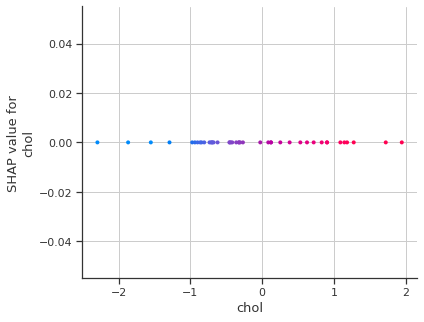

In [63]:
shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=shap_values, 
                     features=X_test)

The Cholesterol dependance plot is confirming what we saw in the summary, that this feature isn't hepling the model decide.

Having features like this and age playing no role in the model predictions could make the model acceptance harder, as we would have to explain why such decisive factors don't contribute to the predictions.

## Dependance pĺot of Chest pain vs ST depression

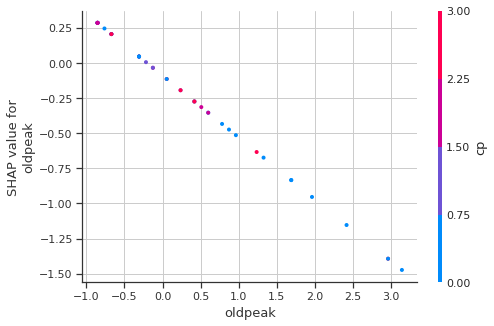

In [64]:
shap.dependence_plot(ind='oldpeak', interaction_index='cp',
                     shap_values=shap_values, 
                     features=X_test)

## Predictions

In [65]:
#transforming the test data
test_submission = test_data.copy()
transformed_data = test_submission.loc[:,numerical].copy()


ct = ColumnTransformer([
    ('Standarization', StandardScaler(), numerical)
], remainder='passthrough')


transformed_data.loc[:,numerical] = ct.fit_transform(transformed_data)
test_submission[numerical] = transformed_data

X_test[numerical] = ct.transform(X_test[numerical])
test_submission.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.985355,0,0,0.426365,0.007961,0,0,0.038299,1,-0.925411,1,0,2
1,-1.109893,0,0,0.426365,-0.136933,0,0,0.038299,1,-0.758983,1,0,2
2,0.633638,1,3,1.668842,0.628935,0,0,-1.199866,0,-0.925411,2,0,2
3,-1.234431,0,2,-1.267923,-2.103350,0,1,1.093032,0,-0.426128,1,0,2
4,-0.860817,1,2,-1.267923,0.007961,0,1,0.038299,0,-0.925411,2,0,2


In [66]:
#saving the predictions with Logistic regression after grid search
prediction = model.predict(test_submission)
index = range(0,len(prediction))
prediction = pd.DataFrame(data=prediction,index=index, columns=["prediction"])
prediction.to_csv('data/prediction__lr_grid_search.csv',index=False)

In [67]:
#saving the predictions with Logistic regression before grid search
prediction = lr.predict(test_submission)
index = range(0,len(prediction))
prediction = pd.DataFrame(data=prediction,index=index, columns=["prediction"])
prediction.to_csv('data/prediction_lr.csv',index=False)

In [68]:
#saving the models

joblib.dump(lr,'model/heart_model_lr.dat')
joblib.dump(model,'model/heart_model_lr_gs.dat')

['model/heart_model_lr_gs.dat']

## Final Remarks

After this what would be left to do would be to try and improve the model further, by:

1 - Testing different classifications models (like decision tree, random forest, XGBoost classifier, etc.)

2 - Test the models without the data scaled.

3 - Trying to find a model that would be more explainable: that is to include both age and cholesterol as decisive features. Since this would help to validate the model with possible clients.

4 - Perform recursive feature elimination to see if reducing features would improve anything.